<a href="https://colab.research.google.com/github/kkrish39/Machine-learning-notebooks/blob/main/time_series_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Simple time series modelling with varying tap delays using linear regression

arr = [2537,3379,2999,2809,2516,2799,3230,3759,3122,3641,3584,3610,3035,3620,3518,3487,3708,4190,3959,4026,3605,4057,3970,4211,4011,4113,
       3841,4083,4201,4232,4492,4905,4583,4894,4460,4754,4723,5447,4728,5016,5675,5838,5752,5926,6223,6482,6032,6725,6773,6916,6859,6845,
       6753,7355,7155,6693,6693,6833,6254,6460,7006,7234,7069,7458,7388,7384,7436,7761,8481,8124,7631,7830,7979,8590,7957,8289,8195,8866,
       8888,9173,8820,10058,9468,9258,8611,9220,8671,9236,8693,8740,9320,9868,9448,9724,8479,8999,8885,10141,9774,10542,10819,11199,11272,
       12050,11372,12457,11684,12169,12284,13457,12820,13794,13606,15114,14769,13514,13916,14931,14089,14877,14745,15274,15450,15512]

In [26]:
from scipy.stats import kurtosis
from scipy.stats import skew
from statistics import stdev
from statistics import mean
from statistics import variance
from statistics import median

import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

In [27]:
def calculateCostFunction(predicted, actual):
    sumOfSquaredError = 0
    m = len(predicted)
    sum = 0
    for i in range(0, m):
        sum = sum + (predicted[i] - actual[i])**2
    result  = sum/(2*m)

    return result

In [28]:
legend =[]
T = 5

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


f1 score --> 0.9810382142154183


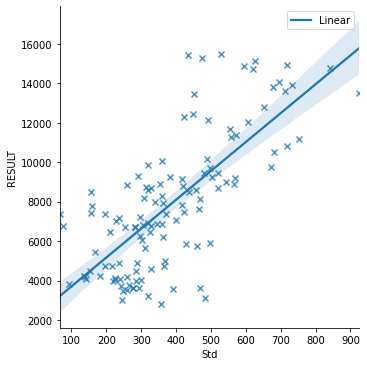

In [29]:
# For Linear Features
finalArr = []
indexArr = []
for i in range(0+T, len(arr)):
    finalArr.append([stdev(arr[i-T:i]), mean(arr[i-T:i]), variance(arr[i-T:i]), arr[i]])
    indexArr.append(i)

df = pandas.DataFrame(data=finalArr, columns=["Std", "Mean", "Variance","RESULT"])

X = df.iloc[:, 0:3].to_numpy()
y = df["RESULT"]

argraph = []

#Linear Regression using gradient descent
model = make_pipeline(StandardScaler(), SGDRegressor(learning_rate='adaptive', eta0=0.001, tol=1e-3))
model.fit(X, y)
print("f1 score -->", model.score(X, y))

predictedValues = np.array(model.predict(X))

# plt.plot(X, model.predict(X), color = "green")
sns.lmplot(x="Std", y="RESULT", markers=["x"], data=df, palette="Set2")

legend.append("Linear")
plt.legend(legend)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


f1 score --> 0.9461854494854351


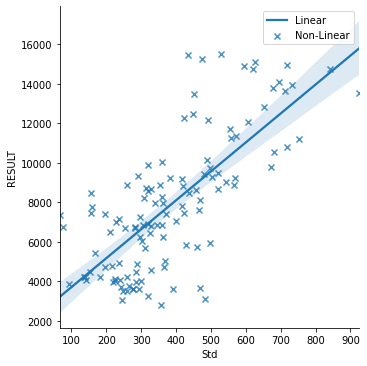

In [30]:
# For Non-Linear Features
finalArr = []
indexArr = []
for i in range(0+T, len(arr)):
    finalArr.append([stdev(arr[i-T:i]), mean(arr[i-T:i])**2, variance(arr[i-T:i])**2, arr[i]])
    indexArr.append(i)

df = pandas.DataFrame(data=finalArr, columns=["Std", "Mean", "Variance","RESULT"])

X = df.iloc[:, 0:3].to_numpy()
y = df["RESULT"]

argraph = []

#Linear Regression using gradient descent
model = make_pipeline(StandardScaler(), SGDRegressor(learning_rate='adaptive', eta0=0.001, tol=1e-3))
model.fit(X, y)
print("f1 score -->", model.score(X, y))

predictedValues = np.array(model.predict(X))

# plt.plot(X, model.predict(X), color = "green")
sns.lmplot(x="Std", y="RESULT", markers=["x"], data=df, palette="Set2")

legend.append("Non-Linear")
plt.legend(legend)